## Summary

 - Baseline: 21602.538 RMSE (+/- 820.945)
 - Baseline, dropout 0.01: 21689.229 RMSE (+/- 1268.972)
 - Baseline, n_input*2: 24129.956 RMSE (+/- 1685.669)
 - Baseline, smaller input: 22559.187 RMSE (+/- 1413.026)
 - 1 level summary, dropout 0.1: 23338.893 RMSE (+/- 866.969)
 - 1 level summary, dropout 0.01 for both 2 layers: 22585.049 RMSE (+/- 1457.674)
 - 1 level summary, dropout 0.01 for both 2 layers and use tanh as activation: **21387.319 RMSE (+/- 1022.509)**
 - 2 level summary, dropout 0.01 for both 3 layers and use tanh as activation: 23709.684 RMSE (+/- 1366.114)
 - 1 level summary, dropout 0.01 for both 2 layers and use tanh as activation, for the output as well: 22669.199 RMSE (+/- 899.247)

## Load libs

In [1]:
%matplotlib inline

# math and data manipulation
import numpy as np
import pandas as pd

# to handle paths
from pathlib import Path

# set random seeds 
from numpy.random import seed
from tensorflow import set_random_seed

from sklearn.preprocessing import MinMaxScaler

from csef.model import lstm
from csef.data import preprocessing, load_data
from csef.utils import performance
from csef.model.base import GeneralModel

RANDOM_SEED = 2018
seed(RANDOM_SEED)
set_random_seed(RANDOM_SEED)

## Data Loading

In [2]:
data_mapping = load_data.load_data()
consumption_train = data_mapping['consumption_train']
cold_start_test = data_mapping['cold_start_test']
submission_format = data_mapping['submission_format']
meta = data_mapping['meta']

In [3]:
samp_df = load_data.sampling_data(consumption_train, frac=0.02)

In [4]:
load_data.describe_training_data(samp_df)

There are 17 training series totaling 476 days (11424 hours) of consumption data.


## Training

In [5]:
train_df, test_df = load_data.train_test_split(samp_df)

/home/thuongdinh/ws/asnet-training/ml-training/ml-energy-forecasting/csef/data/load_data.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  split_train[group_col] = ser_id
/home/thuongdinh/ws/asnet-training/ml-training/ml-energy-forecasting/csef/data/load_data.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  split_test[group_col] = ser_id


In [6]:
load_data.describe_training_data(train_df)

There are 17 training series totaling 476 days (11424 hours) of consumption data.


In [7]:
# Default config
n_batch = 1
n_input = 24
n_nodes = 24

batch_input_shape = (n_batch, 1, n_input)

## Baseline

In [10]:
config = {
    'n_input': n_input,
    'n_nodes': n_nodes,
    'n_batch': n_batch,
    'model': [
        {
            'layer_type': 'LSTM',
            'layer_config': {
                'units': n_input,
                'batch_input_shape': batch_input_shape,
                'stateful': True
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': 1
            }
        }
    ]
}

In [11]:
scores = performance.repeat_evaluate(GeneralModel, train_df, test_df, config, n_repeats=5)

Fitting the data: 100%|██████████| 17/17 [00:30<00:00,  1.71s/it]


Id: 100283, Error: 51477.76225067523
Id: 100419, Error: 21662.251606591464
Id: 100421, Error: 23245.445978141972
Id: 100425, Error: 7583.343077772251
Id: 100819, Error: 449.6558928292456
Id: 100973, Error: 2305.1000217093165
Id: 101211, Error: 7425.63019829345
Id: 101321, Error: 3098.013203150132
Id: 101569, Error: 16219.291891771407
Id: 101751, Error: 12941.967609860445
Id: 101819, Error: 4123.788489878422
Id: 101980, Error: 196085.3309202393
Id: 102008, Error: 16046.738036908666
Id: 102093, Error: 1791.6328369786022
Id: 102822, Error: 5096.363998816191
Id: 102918, Error: 2242.5160173435056
Id: 103320, Error: 1870.0038749163293
 > 21980.284


Fitting the data: 100%|██████████| 17/17 [00:30<00:00,  1.72s/it]


Id: 100283, Error: 41236.78781247816
Id: 100419, Error: 19566.737611037206
Id: 100421, Error: 23168.14933333441
Id: 100425, Error: 7432.255258921716
Id: 100819, Error: 377.83747850171386
Id: 100973, Error: 2140.6996306607143
Id: 101211, Error: 7272.141600550611
Id: 101321, Error: 2264.6937757566766
Id: 101569, Error: 16274.744499380424
Id: 101751, Error: 13059.351428046246
Id: 101819, Error: 3766.6332554447904
Id: 101980, Error: 194445.07684879703
Id: 102008, Error: 16372.34202506231
Id: 102093, Error: 1469.1771701464422
Id: 102822, Error: 4424.5381474467
Id: 102918, Error: 1871.982830467546
Id: 103320, Error: 1691.7974995194963
 > 20990.291


Fitting the data: 100%|██████████| 17/17 [00:31<00:00,  1.73s/it]


Id: 100283, Error: 52204.083310495334
Id: 100419, Error: 19515.786197027028
Id: 100421, Error: 21338.368296920988
Id: 100425, Error: 8326.045394029861
Id: 100819, Error: 396.0877163186962
Id: 100973, Error: 2156.9269018088016
Id: 101211, Error: 7136.005953168772
Id: 101321, Error: 2209.7654273188687
Id: 101569, Error: 16195.994188215087
Id: 101751, Error: 13636.944444151333
Id: 101819, Error: 4035.5989114253903
Id: 101980, Error: 180361.57239374702
Id: 102008, Error: 17927.607615845078
Id: 102093, Error: 1310.058185497889
Id: 102822, Error: 4818.903167008041
Id: 102918, Error: 2251.890938112478
Id: 103320, Error: 1528.933017643716
 > 20902.975


Fitting the data: 100%|██████████| 17/17 [00:31<00:00,  1.74s/it]


Id: 100283, Error: 62177.61910376844
Id: 100419, Error: 23809.320596717556
Id: 100421, Error: 27426.705222730205
Id: 100425, Error: 7359.612714500651
Id: 100819, Error: 383.3901694042955
Id: 100973, Error: 2349.2651948735347
Id: 101211, Error: 7223.67520149241
Id: 101321, Error: 2687.7399013045515
Id: 101569, Error: 16723.09950021989
Id: 101751, Error: 13688.422622752056
Id: 101819, Error: 4644.466848367749
Id: 101980, Error: 160899.02766001315
Id: 102008, Error: 18016.892151404307
Id: 102093, Error: 1046.4019676162798
Id: 102822, Error: 5523.75323539586
Id: 102918, Error: 2250.9556939057134
Id: 103320, Error: 2287.2556882701006
 > 21088.094


Fitting the data: 100%|██████████| 17/17 [00:31<00:00,  1.75s/it]


Id: 100283, Error: 64729.62297593523
Id: 100419, Error: 21660.465440309817
Id: 100421, Error: 20684.57020315459
Id: 100425, Error: 8974.1821390259
Id: 100819, Error: 419.9558182823641
Id: 100973, Error: 2563.589872132918
Id: 101211, Error: 7206.398839365903
Id: 101321, Error: 4020.646624901139
Id: 101569, Error: 16175.199117934593
Id: 101751, Error: 13911.988954939201
Id: 101819, Error: 3941.8475520546035
Id: 101980, Error: 198799.9674257875
Id: 102008, Error: 17780.779065012997
Id: 102093, Error: 1533.9009017398432
Id: 102822, Error: 5281.550132064466
Id: 102918, Error: 2738.4669307053596
Id: 103320, Error: 1444.635138370938
 > 23051.045


lstm: 21602.538 RMSE (+/- 820.945)


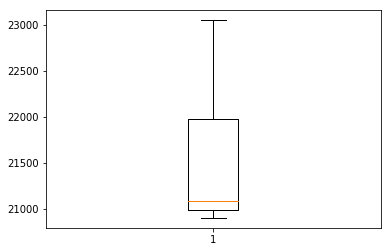

In [12]:
performance.summarize_scores('lstm', [score[0] for score in scores])

## Dropout the baseline

In [8]:
config = {
    'n_input': n_input,
    'n_nodes': n_nodes,
    'n_batch': n_batch,
    'model': [
        {
            'layer_type': 'LSTM',
            'layer_config': {
                'units': n_input,
                'batch_input_shape': batch_input_shape,
                'stateful': True
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.1
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': 1
            }
        }
    ]
}

Fitting the data: 100%|██████████| 17/17 [00:29<00:00,  1.66s/it]


Id: 100283, Error: 60802.46291364583
Id: 100419, Error: 21792.61115629104
Id: 100421, Error: 29801.155275267094
Id: 100425, Error: 9422.4323168187
Id: 100819, Error: 431.20954718357183
Id: 100973, Error: 2467.5874309760197
Id: 101211, Error: 7250.976348298908
Id: 101321, Error: 3722.3374825356314
Id: 101569, Error: 16836.236008626747
Id: 101751, Error: 13322.958122441409
Id: 101819, Error: 4058.61211630244
Id: 101980, Error: 192918.6814966998
Id: 102008, Error: 17474.519888991577
Id: 102093, Error: 1053.3282218009206
Id: 102822, Error: 6027.180818299865
Id: 102918, Error: 2230.5649427512926
Id: 103320, Error: 1636.9087415609465
 > 23014.692


Fitting the data: 100%|██████████| 17/17 [00:29<00:00,  1.69s/it]


Id: 100283, Error: 78925.73532536374
Id: 100419, Error: 17134.217642320804
Id: 100421, Error: 19470.864710694783
Id: 100425, Error: 6397.033303538744
Id: 100819, Error: 384.36859570609755
Id: 100973, Error: 2325.136444620521
Id: 101211, Error: 7201.372533615016
Id: 101321, Error: 3423.811079862173
Id: 101569, Error: 16214.1735984692
Id: 101751, Error: 13999.380622800114
Id: 101819, Error: 2645.5340237946
Id: 101980, Error: 194647.51503109455
Id: 102008, Error: 18583.760025640287
Id: 102093, Error: 1468.6516619992508
Id: 102822, Error: 4703.436286057023
Id: 102918, Error: 2492.957744207118
Id: 103320, Error: 1725.818639196794
 > 23043.751


Fitting the data: 100%|██████████| 17/17 [00:29<00:00,  1.69s/it]


Id: 100283, Error: 63469.83149725242
Id: 100419, Error: 21861.979748007707
Id: 100421, Error: 22477.958921473346
Id: 100425, Error: 6308.002946738813
Id: 100819, Error: 394.72897356444855
Id: 100973, Error: 2028.1923296241305
Id: 101211, Error: 7204.925633502709
Id: 101321, Error: 2155.434843452667
Id: 101569, Error: 16517.197820660902
Id: 101751, Error: 13556.735074664326
Id: 101819, Error: 3315.0887632821064
Id: 101980, Error: 163377.94694684652
Id: 102008, Error: 17482.198395172174
Id: 102093, Error: 1242.1074516897236
Id: 102822, Error: 4131.001974841889
Id: 102918, Error: 1850.2913865484188
Id: 103320, Error: 2245.8797528785367
 > 20565.853


Fitting the data: 100%|██████████| 17/17 [00:30<00:00,  1.71s/it]


Id: 100283, Error: 38880.46430665862
Id: 100419, Error: 18352.551839811695
Id: 100421, Error: 21043.53364716299
Id: 100425, Error: 7236.579634745681
Id: 100819, Error: 364.2460106629754
Id: 100973, Error: 1950.278782921395
Id: 101211, Error: 7175.851963586744
Id: 101321, Error: 2060.159820966513
Id: 101569, Error: 16255.65726152451
Id: 101751, Error: 12989.81196839749
Id: 101819, Error: 2930.974948943995
Id: 101980, Error: 183122.11467907167
Id: 102008, Error: 16652.302970201505
Id: 102093, Error: 1368.5543127840244
Id: 102822, Error: 4893.615693374289
Id: 102918, Error: 1900.2979409383188
Id: 103320, Error: 1366.7180055944445
 > 19914.336


Fitting the data: 100%|██████████| 17/17 [00:30<00:00,  1.72s/it]


Id: 100283, Error: 55805.22131495459
Id: 100419, Error: 16406.55154310299
Id: 100421, Error: 21923.89594846501
Id: 100425, Error: 7189.781462575735
Id: 100819, Error: 386.14480641192694
Id: 100973, Error: 2238.609756434989
Id: 101211, Error: 7210.042886174283
Id: 101321, Error: 2664.036488812119
Id: 101569, Error: 16429.42576937447
Id: 101751, Error: 14015.57623079764
Id: 101819, Error: 3483.4820909792434
Id: 101980, Error: 197432.88421745828
Id: 102008, Error: 17881.698580651962
Id: 102093, Error: 1343.312859940971
Id: 102822, Error: 5228.690207658012
Id: 102918, Error: 1450.9379717038257
Id: 103320, Error: 1337.425771219927
 > 21907.513
lstm: 21689.229 RMSE (+/- 1268.972)


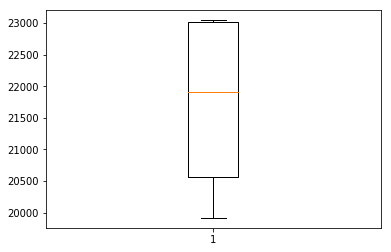

In [9]:
scores = performance.repeat_evaluate(GeneralModel, train_df, test_df, config, n_repeats=5)
performance.summarize_scores('lstm', [score[0] for score in scores])

## Baseline with bigger n_input

In [10]:
config = {
    'n_input': n_input,
    'n_nodes': n_nodes,
    'n_batch': n_batch,
    'model': [
        {
            'layer_type': 'LSTM',
            'layer_config': {
                'units': n_input * 2,
                'batch_input_shape': batch_input_shape,
                'stateful': True
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': 1
            }
        }
    ]
}

Fitting the data: 100%|██████████| 17/17 [00:29<00:00,  1.68s/it]


Id: 100283, Error: 78520.90270773112
Id: 100419, Error: 25579.245669423904
Id: 100421, Error: 25647.282852170985
Id: 100425, Error: 8650.53968779485
Id: 100819, Error: 406.9403481859958
Id: 100973, Error: 2353.007944440271
Id: 101211, Error: 7253.336312937117
Id: 101321, Error: 2814.791680347606
Id: 101569, Error: 16087.99828543105
Id: 101751, Error: 13307.898997576403
Id: 101819, Error: 5401.508808445554
Id: 101980, Error: 210922.53520017743
Id: 102008, Error: 16950.945257441286
Id: 102093, Error: 1412.3095010903817
Id: 102822, Error: 5186.9361689608
Id: 102918, Error: 1933.0791921389293
Id: 103320, Error: 1633.1152710649865
 > 24944.846


Fitting the data: 100%|██████████| 17/17 [00:30<00:00,  1.69s/it]


Id: 100283, Error: 98694.02489088876
Id: 100419, Error: 17251.1843093113
Id: 100421, Error: 26266.77143748826
Id: 100425, Error: 9229.79837215168
Id: 100819, Error: 439.11344141273895
Id: 100973, Error: 3178.7759743898355
Id: 101211, Error: 7259.538719351344
Id: 101321, Error: 4730.812155770809
Id: 101569, Error: 16465.33553915178
Id: 101751, Error: 13395.57466067699
Id: 101819, Error: 2835.136727132851
Id: 101980, Error: 199242.00318888287
Id: 102008, Error: 16523.027440517773
Id: 102093, Error: 1378.5439925452574
Id: 102822, Error: 6392.852455186551
Id: 102918, Error: 3033.910916220039
Id: 103320, Error: 2303.7866890390355
 > 25212.952


Fitting the data: 100%|██████████| 17/17 [00:30<00:00,  1.69s/it]


Id: 100283, Error: 95761.45153512988
Id: 100419, Error: 23797.25226349651
Id: 100421, Error: 25252.608095355565
Id: 100425, Error: 11584.573361989193
Id: 100819, Error: 400.5453350419482
Id: 100973, Error: 2663.9372874350825
Id: 101211, Error: 7312.640828109383
Id: 101321, Error: 4159.886387816055
Id: 101569, Error: 16791.071469958966
Id: 101751, Error: 13423.777511236221
Id: 101819, Error: 3799.477618804125
Id: 101980, Error: 212862.8493401961
Id: 102008, Error: 16504.742997391066
Id: 102093, Error: 1104.388801282146
Id: 102822, Error: 4891.003146224942
Id: 102918, Error: 2627.60426486295
Id: 103320, Error: 1436.1079761795856
 > 26139.642


Fitting the data: 100%|██████████| 17/17 [00:30<00:00,  1.71s/it]


Id: 100283, Error: 90000.58473370857
Id: 100419, Error: 17151.20882655545
Id: 100421, Error: 14922.536552959253
Id: 100425, Error: 7817.122569236445
Id: 100819, Error: 399.06843674647797
Id: 100973, Error: 2204.5007740916612
Id: 101211, Error: 7285.151839543793
Id: 101321, Error: 3358.7304011199535
Id: 101569, Error: 16590.877406155618
Id: 101751, Error: 13555.135264206234
Id: 101819, Error: 2008.276912683915
Id: 101980, Error: 184103.96758988555
Id: 102008, Error: 17463.668961234467
Id: 102093, Error: 1188.7483580719925
Id: 102822, Error: 4584.706072726423
Id: 102918, Error: 2554.861448598442
Id: 103320, Error: 1841.969804991808
 > 22766.536


Fitting the data: 100%|██████████| 17/17 [00:31<00:00,  1.72s/it]


Id: 100283, Error: 63420.305622672306
Id: 100419, Error: 16490.02746918537
Id: 100421, Error: 18989.38843796194
Id: 100425, Error: 7513.95763371309
Id: 100819, Error: 453.5757439584466
Id: 100973, Error: 1934.626107626152
Id: 101211, Error: 7277.462142635163
Id: 101321, Error: 2760.257065157965
Id: 101569, Error: 15869.96132971809
Id: 101751, Error: 12798.692661461982
Id: 101819, Error: 3522.8655792638856
Id: 101980, Error: 190246.76047992648
Id: 102008, Error: 16034.360134666224
Id: 102093, Error: 1835.9219760034066
Id: 102822, Error: 3849.1157072986675
Id: 102918, Error: 2649.6389815695716
Id: 103320, Error: 1311.70877905388
 > 21585.802
lstm: 24129.956 RMSE (+/- 1685.669)


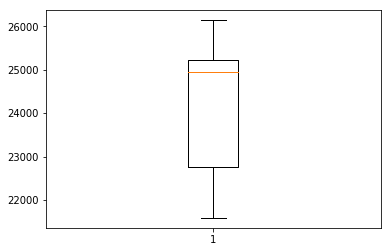

In [11]:
scores = performance.repeat_evaluate(GeneralModel, train_df, test_df, config, n_repeats=5)
performance.summarize_scores('lstm', [score[0] for score in scores])

## 1 level summary with smaller input

In [12]:
config = {
    'n_input': n_input,
    'n_nodes': n_nodes,
    'n_batch': n_batch,
    'model': [
        {
            'layer_type': 'LSTM',
            'layer_config': {
                'units': n_input,
                'batch_input_shape': batch_input_shape,
                'stateful': True
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': int(n_input / 2),
                'activation': 'relu'
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.1
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': 1
            }
        }
    ]
}

Fitting the data: 100%|██████████| 17/17 [00:34<00:00,  1.94s/it]


Id: 100283, Error: 87243.94191822923
Id: 100419, Error: 29122.515193409417
Id: 100421, Error: 26232.883075132635
Id: 100425, Error: 10187.723928593276
Id: 100819, Error: 405.2699641673209
Id: 100973, Error: 2310.3782759467217
Id: 101211, Error: 7194.3822480697445
Id: 101321, Error: 3625.285441635795
Id: 101569, Error: 16284.459403395449
Id: 101751, Error: 13914.453950169715
Id: 101819, Error: 5020.0168696386
Id: 101980, Error: 152112.7636406887
Id: 102008, Error: 18317.060608752567
Id: 102093, Error: 1349.4354215970445
Id: 102822, Error: 5818.616693570762
Id: 102918, Error: 2476.4562596989313
Id: 103320, Error: 2655.3602547676337
 > 22604.177


Fitting the data: 100%|██████████| 17/17 [00:35<00:00,  1.94s/it]


Id: 100283, Error: 102648.64921520189
Id: 100419, Error: 23485.795201974153
Id: 100421, Error: 18109.110193281154
Id: 100425, Error: 8777.898771534865
Id: 100819, Error: 418.61120813085216
Id: 100973, Error: 1910.9385747539684
Id: 101211, Error: 7220.57621849183
Id: 101321, Error: 3141.681013590665
Id: 101569, Error: 15885.598795583644
Id: 101751, Error: 11519.911713288699
Id: 101819, Error: 3625.0370348053834
Id: 101980, Error: 187781.8297543449
Id: 102008, Error: 15104.394700692215
Id: 102093, Error: 1751.7417858431352
Id: 102822, Error: 5155.785648973483
Id: 102918, Error: 2877.1267829999256
Id: 103320, Error: 1905.9204099716626
 > 24195.330


Fitting the data: 100%|██████████| 17/17 [00:35<00:00,  1.98s/it]


Id: 100283, Error: 62622.419498538016
Id: 100419, Error: 23673.74752512874
Id: 100421, Error: 16006.955730159121
Id: 100425, Error: 6920.902762283818
Id: 100819, Error: 356.253369025527
Id: 100973, Error: 2023.0083683373352
Id: 101211, Error: 7260.544354088651
Id: 101321, Error: 2802.1780832937125
Id: 101569, Error: 16171.954078516164
Id: 101751, Error: 13444.420688827304
Id: 101819, Error: 2193.21636797991
Id: 101980, Error: 175759.8085976978
Id: 102008, Error: 17196.86354633054
Id: 102093, Error: 1421.8086451696051
Id: 102822, Error: 4038.767061235552
Id: 102918, Error: 2400.969653876351
Id: 103320, Error: 1858.8770876397746
 > 20950.159


Fitting the data: 100%|██████████| 17/17 [00:36<00:00,  1.99s/it]


Id: 100283, Error: 87024.65531161164
Id: 100419, Error: 19517.286015210793
Id: 100421, Error: 17896.53350799324
Id: 100425, Error: 9813.960762144738
Id: 100819, Error: 383.9395236120933
Id: 100973, Error: 2547.6575673998104
Id: 101211, Error: 7155.565190861586
Id: 101321, Error: 4473.8048734048325
Id: 101569, Error: 16189.226864434015
Id: 101751, Error: 12092.528183409197
Id: 101819, Error: 3033.0876027573468
Id: 101980, Error: 201015.08527733677
Id: 102008, Error: 15976.464209072825
Id: 102093, Error: 1454.6071228798312
Id: 102822, Error: 5519.882990156493
Id: 102918, Error: 3121.6589907152497
Id: 103320, Error: 1772.919614975711
 > 24058.168


Fitting the data: 100%|██████████| 17/17 [00:36<00:00,  2.00s/it]


Id: 100283, Error: 70971.71761033234
Id: 100419, Error: 21064.149882345842
Id: 100421, Error: 18558.77721530756
Id: 100425, Error: 6848.976768144254
Id: 100819, Error: 378.5516499888333
Id: 100973, Error: 1986.7066350329303
Id: 101211, Error: 7255.219232387331
Id: 101321, Error: 2171.576519352846
Id: 101569, Error: 15918.360122320111
Id: 101751, Error: 12672.241453123564
Id: 101819, Error: 3227.8583074026665
Id: 101980, Error: 168236.91653819603
Id: 102008, Error: 16270.628001478259
Id: 102093, Error: 1617.6423962881515
Id: 102822, Error: 5058.729376807493
Id: 102918, Error: 2495.694313574395
Id: 103320, Error: 2063.99125797385
 > 20988.102
lstm: 22559.187 RMSE (+/- 1413.026)


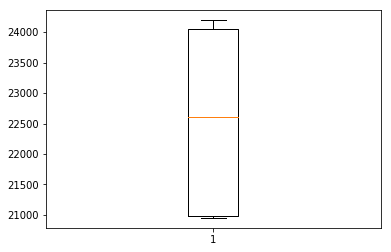

In [13]:
scores = performance.repeat_evaluate(GeneralModel, train_df, test_df, config, n_repeats=5)
performance.summarize_scores('lstm', [score[0] for score in scores])

## Summary 1 level

In [15]:
config = {
    'n_input': n_input,
    'n_nodes': n_nodes,
    'n_batch': n_batch,
    'model': [
        {
            'layer_type': 'LSTM',
            'layer_config': {
                'units': n_input,
                'batch_input_shape': batch_input_shape,
                'stateful': True
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': n_input,
                'activation': 'relu'
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.1
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': 1
            }
        }
    ]
}

In [16]:
scores = performance.repeat_evaluate(GeneralModel, train_df, test_df, config, n_repeats=5)

Fitting the data: 100%|██████████| 17/17 [00:33<00:00,  1.89s/it]


Id: 100283, Error: 95678.40208180957
Id: 100419, Error: 23196.01886519484
Id: 100421, Error: 16846.231360793998
Id: 100425, Error: 7880.339205366631
Id: 100819, Error: 376.4038581930466
Id: 100973, Error: 2103.3533301774664
Id: 101211, Error: 7140.437381887918
Id: 101321, Error: 2638.8231123977316
Id: 101569, Error: 15754.803971622407
Id: 101751, Error: 12447.755673877937
Id: 101819, Error: 2973.9060300559468
Id: 101980, Error: 185834.8366437383
Id: 102008, Error: 15955.252999034938
Id: 102093, Error: 1672.5907066456264
Id: 102822, Error: 4454.451100775261
Id: 102918, Error: 2516.7039881629903
Id: 103320, Error: 1903.3327767791372
 > 23492.567


Fitting the data: 100%|██████████| 17/17 [00:33<00:00,  1.90s/it]


Id: 100283, Error: 100424.42279740772
Id: 100419, Error: 22351.371485187967
Id: 100421, Error: 17176.93781974618
Id: 100425, Error: 8390.343158496442
Id: 100819, Error: 335.8773406813539
Id: 100973, Error: 2245.0377580097243
Id: 101211, Error: 7222.22482337142
Id: 101321, Error: 3720.7854064657818
Id: 101569, Error: 16042.741951993039
Id: 101751, Error: 13269.244462006027
Id: 101819, Error: 3250.9035881680343
Id: 101980, Error: 186486.88580130937
Id: 102008, Error: 17864.182379148388
Id: 102093, Error: 1546.0021001688183
Id: 102822, Error: 4674.607676014678
Id: 102918, Error: 3198.3721780041838
Id: 103320, Error: 2048.717403587489
 > 24132.274


Fitting the data: 100%|██████████| 17/17 [00:34<00:00,  1.92s/it]


Id: 100283, Error: 120168.39063844837
Id: 100419, Error: 29685.904986376976
Id: 100421, Error: 18069.734515463282
Id: 100425, Error: 8338.792277934615
Id: 100819, Error: 372.21319790972575
Id: 100973, Error: 1930.77521189922
Id: 101211, Error: 7150.553261310838
Id: 101321, Error: 2587.597223760348
Id: 101569, Error: 16218.239433876524
Id: 101751, Error: 12661.136461492884
Id: 101819, Error: 3384.32249957061
Id: 101980, Error: 165661.13994411126
Id: 102008, Error: 15618.150827236555
Id: 102093, Error: 1337.900641860016
Id: 102822, Error: 4508.375406976328
Id: 102918, Error: 2520.669480351804
Id: 103320, Error: 2576.0903854495127
 > 24281.764


Fitting the data: 100%|██████████| 17/17 [00:34<00:00,  1.93s/it]


Id: 100283, Error: 103307.35174068266
Id: 100419, Error: 23345.34916329058
Id: 100421, Error: 19015.0557444858
Id: 100425, Error: 6756.294603699899
Id: 100819, Error: 378.64450520502595
Id: 100973, Error: 1713.6284415842008
Id: 101211, Error: 7172.3742465543655
Id: 101321, Error: 2351.383710915911
Id: 101569, Error: 15869.138242210674
Id: 101751, Error: 13325.703194970038
Id: 101819, Error: 3860.7977308785994
Id: 101980, Error: 161312.4486517147
Id: 102008, Error: 17884.27430386595
Id: 102093, Error: 1642.056792247661
Id: 102822, Error: 5691.94222692271
Id: 102918, Error: 2600.800547441899
Id: 103320, Error: 2353.9706870919717
 > 22857.719


Fitting the data: 100%|██████████| 17/17 [00:35<00:00,  1.95s/it]


Id: 100283, Error: 69800.95218149589
Id: 100419, Error: 20008.75114198372
Id: 100421, Error: 20147.00876422194
Id: 100425, Error: 7437.177940840845
Id: 100819, Error: 373.98866474736934
Id: 100973, Error: 1926.6101430002243
Id: 101211, Error: 7314.406103853253
Id: 101321, Error: 2174.5670245103242
Id: 101569, Error: 16382.603465867249
Id: 101751, Error: 14041.772852911286
Id: 101819, Error: 3426.153441602364
Id: 101980, Error: 181771.53252223425
Id: 102008, Error: 18614.45549690214
Id: 102093, Error: 1336.1183102842576
Id: 102822, Error: 4060.407784450335
Id: 102918, Error: 2022.699759311646
Id: 103320, Error: 1973.2349851100162
 > 21930.144


lstm: 23338.893 RMSE (+/- 866.969)


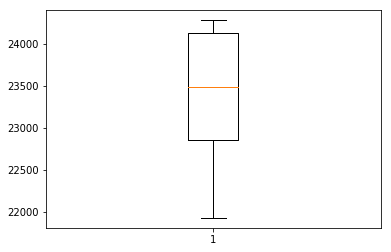

In [17]:
performance.summarize_scores('lstm', [score[0] for score in scores])

## Approach 2

In [8]:
config = {
    'n_input': n_input,
    'n_nodes': n_nodes,
    'n_batch': n_batch,
    'model': [
        {
            'layer_type': 'LSTM',
            'layer_config': {
                'units': n_input,
                'batch_input_shape': batch_input_shape,
                'stateful': True
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.01
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': n_input,
                'activation': 'relu'
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.01
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': 1
            }
        }
    ]
}

Fitting the data: 100%|██████████| 17/17 [00:33<00:00,  1.85s/it]


Id: 100283, Error: 70780.23477218207
Id: 100419, Error: 17342.441296729925
Id: 100421, Error: 14033.741112354963
Id: 100425, Error: 7211.175586008278
Id: 100819, Error: 400.7147841067646
Id: 100973, Error: 1950.8996711738064
Id: 101211, Error: 7045.663167705982
Id: 101321, Error: 3118.8029345109658
Id: 101569, Error: 15232.446671489794
Id: 101751, Error: 11512.776655129288
Id: 101819, Error: 2291.1573777297112
Id: 101980, Error: 180781.07864599008
Id: 102008, Error: 14931.449851152496
Id: 102093, Error: 1996.2861965017873
Id: 102822, Error: 5152.5869953576175
Id: 102918, Error: 2807.8936120187313
Id: 103320, Error: 2223.0713412197188
 > 21106.613


Fitting the data: 100%|██████████| 17/17 [00:32<00:00,  1.86s/it]


Id: 100283, Error: 82033.41520858926
Id: 100419, Error: 20756.758725148327
Id: 100421, Error: 22263.38535650338
Id: 100425, Error: 7101.02455924395
Id: 100819, Error: 390.9760736966894
Id: 100973, Error: 1996.0268790798327
Id: 101211, Error: 7202.364020604745
Id: 101321, Error: 2125.022518892456
Id: 101569, Error: 15835.090423947193
Id: 101751, Error: 12818.742752266413
Id: 101819, Error: 3590.098701796232
Id: 101980, Error: 167034.0717163037
Id: 102008, Error: 16920.033436801492
Id: 102093, Error: 1759.7772238299178
Id: 102822, Error: 5193.868002388452
Id: 102918, Error: 2169.5538037774804
Id: 103320, Error: 1993.8489926105383
 > 21834.356


Fitting the data: 100%|██████████| 17/17 [00:33<00:00,  1.87s/it]


Id: 100283, Error: 77735.57570342235
Id: 100419, Error: 24359.52538462736
Id: 100421, Error: 24497.324451343313
Id: 100425, Error: 7567.802028947376
Id: 100819, Error: 399.3117755097048
Id: 100973, Error: 1553.8232872953292
Id: 101211, Error: 7277.629729873751
Id: 101321, Error: 2613.725019232581
Id: 101569, Error: 16125.76956580495
Id: 101751, Error: 13904.869772152335
Id: 101819, Error: 4630.209436307305
Id: 101980, Error: 155831.975387141
Id: 102008, Error: 18945.537700758592
Id: 102093, Error: 1394.0081621581892
Id: 102822, Error: 5909.804812642747
Id: 102918, Error: 2231.901758892324
Id: 103320, Error: 2548.6402186840755
 > 21619.261


Fitting the data: 100%|██████████| 17/17 [00:33<00:00,  1.89s/it]


Id: 100283, Error: 102261.47433027405
Id: 100419, Error: 27059.017246624357
Id: 100421, Error: 25647.002043185097
Id: 100425, Error: 5690.014050666905
Id: 100819, Error: 366.09111228830807
Id: 100973, Error: 1763.0293175674615
Id: 101211, Error: 7206.141064246224
Id: 101321, Error: 2340.624269773473
Id: 101569, Error: 16180.192736638075
Id: 101751, Error: 13053.592294662798
Id: 101819, Error: 5472.979948796833
Id: 101980, Error: 158167.5111116569
Id: 102008, Error: 16838.95729129
Id: 102093, Error: 1568.1354608206593
Id: 102822, Error: 6248.7705009947795
Id: 102918, Error: 2073.6050098022292
Id: 103320, Error: 2867.442965855033
 > 23223.799


Fitting the data: 100%|██████████| 17/17 [00:33<00:00,  1.90s/it]


Id: 100283, Error: 121290.30840746163
Id: 100419, Error: 19460.544969461444
Id: 100421, Error: 14563.235170183636
Id: 100425, Error: 6659.032011038954
Id: 100819, Error: 357.9382513367634
Id: 100973, Error: 2349.9619442337557
Id: 101211, Error: 7236.962972905498
Id: 101321, Error: 3021.386500382905
Id: 101569, Error: 16092.863093312177
Id: 101751, Error: 12586.273769839718
Id: 101819, Error: 3003.8100016448893
Id: 101980, Error: 192593.3940742337
Id: 102008, Error: 16709.552419248426
Id: 102093, Error: 1558.829933042233
Id: 102822, Error: 4635.985019357316
Id: 102918, Error: 2821.7706596021308
Id: 103320, Error: 2458.8624606728768
 > 25141.218
lstm: 22585.049 RMSE (+/- 1457.674)


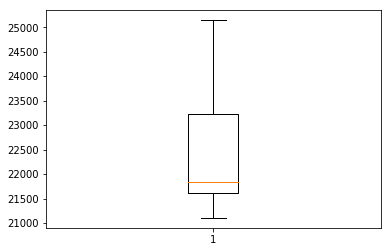

In [9]:
scores = performance.repeat_evaluate(GeneralModel, train_df, test_df, config, n_repeats=5)
performance.summarize_scores('lstm', [score[0] for score in scores])

## Approach 3 - use tanh

In [13]:
config = {
    'n_input': n_input,
    'n_nodes': n_nodes,
    'n_batch': n_batch,
    'model': [
        {
            'layer_type': 'LSTM',
            'layer_config': {
                'units': n_input,
                'batch_input_shape': batch_input_shape,
                'stateful': True
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.01
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': n_input,
                'activation': 'tanh'
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.01
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': 1
            }
        }
    ]
}

Fitting the data: 100%|██████████| 17/17 [00:36<00:00,  2.00s/it]


Id: 100283, Error: 86185.16406604365
Id: 100419, Error: 30618.69268593761
Id: 100421, Error: 29879.48151890529
Id: 100425, Error: 7264.701518152404
Id: 100819, Error: 365.44590768652716
Id: 100973, Error: 2580.2972305351655
Id: 101211, Error: 7181.757744507449
Id: 101321, Error: 3387.586071795393
Id: 101569, Error: 16219.847349004107
Id: 101751, Error: 13183.780835793443
Id: 101819, Error: 6006.620523666893
Id: 101980, Error: 141617.79566253914
Id: 102008, Error: 17427.096447941578
Id: 102093, Error: 1364.557506743181
Id: 102822, Error: 6607.67101294459
Id: 102918, Error: 1875.5242154538253
Id: 103320, Error: 3177.8764768381884
 > 22055.523


Fitting the data: 100%|██████████| 17/17 [00:36<00:00,  2.03s/it]


Id: 100283, Error: 53647.06732345734
Id: 100419, Error: 21926.80674576011
Id: 100421, Error: 22171.513646124386
Id: 100425, Error: 7750.70075032927
Id: 100819, Error: 413.52575725686
Id: 100973, Error: 2160.3490074095953
Id: 101211, Error: 7225.15545601826
Id: 101321, Error: 2695.310512492125
Id: 101569, Error: 15655.782840775333
Id: 101751, Error: 12575.194527359474
Id: 101819, Error: 4321.931928690282
Id: 101980, Error: 161613.47471686336
Id: 102008, Error: 16653.545397561673
Id: 102093, Error: 1876.1111913621742
Id: 102822, Error: 4935.358551383438
Id: 102918, Error: 2578.7834161269993
Id: 103320, Error: 2163.210019815725
 > 20021.401


Fitting the data: 100%|██████████| 17/17 [00:37<00:00,  2.05s/it]


Id: 100283, Error: 56571.14595548706
Id: 100419, Error: 28914.39901420374
Id: 100421, Error: 26015.61260752624
Id: 100425, Error: 8600.330381558817
Id: 100819, Error: 374.0890928177123
Id: 100973, Error: 2511.3020291108483
Id: 101211, Error: 7183.037697017567
Id: 101321, Error: 4216.020569805511
Id: 101569, Error: 15915.621606336426
Id: 101751, Error: 13063.085973361207
Id: 101819, Error: 4818.849763645251
Id: 101980, Error: 146287.0800379292
Id: 102008, Error: 16893.08375398942
Id: 102093, Error: 1522.6598980350457
Id: 102822, Error: 6292.0132139804655
Id: 102918, Error: 2644.449068968297
Id: 103320, Error: 2685.4802163519994
 > 20265.192


Fitting the data: 100%|██████████| 17/17 [00:37<00:00,  2.06s/it]


Id: 100283, Error: 81834.62905382185
Id: 100419, Error: 20726.063812213
Id: 100421, Error: 22433.152740424983
Id: 100425, Error: 7989.675913710321
Id: 100819, Error: 386.31375444404574
Id: 100973, Error: 2141.493260299554
Id: 101211, Error: 7392.031317238213
Id: 101321, Error: 2182.1437167148515
Id: 101569, Error: 16095.409537347545
Id: 101751, Error: 12797.074498798878
Id: 101819, Error: 3797.099202203755
Id: 101980, Error: 172274.0601099604
Id: 102008, Error: 17503.809734551964
Id: 102093, Error: 1809.403858192425
Id: 102822, Error: 5397.784432902782
Id: 102918, Error: 2298.180861571792
Id: 103320, Error: 2206.7431500172074
 > 22309.710


Fitting the data: 100%|██████████| 17/17 [00:37<00:00,  2.07s/it]


Id: 100283, Error: 75714.94180230422
Id: 100419, Error: 28960.0476620368
Id: 100421, Error: 25003.17186372205
Id: 100425, Error: 9187.213188894466
Id: 100819, Error: 400.19799517986786
Id: 100973, Error: 2635.365888935721
Id: 101211, Error: 7247.8770761438145
Id: 101321, Error: 3549.0327254913586
Id: 101569, Error: 16025.071290755928
Id: 101751, Error: 13482.388711272319
Id: 101819, Error: 4327.96624602809
Id: 101980, Error: 162667.74982263858
Id: 102008, Error: 17042.007744614883
Id: 102093, Error: 1470.466590282751
Id: 102822, Error: 6273.451025407169
Id: 102918, Error: 2298.414724727632
Id: 103320, Error: 2555.738343678648
 > 22284.771
lstm: 21387.319 RMSE (+/- 1022.509)


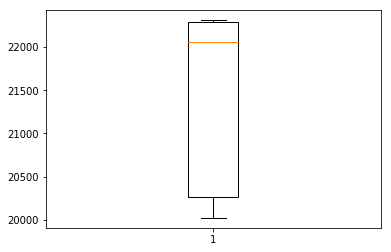

In [14]:
scores = performance.repeat_evaluate(GeneralModel, train_df, test_df, config, n_repeats=5)
performance.summarize_scores('lstm', [score[0] for score in scores])

## Approach 4 - use tanh & deeper

In [15]:
config = {
    'n_input': n_input,
    'n_nodes': n_nodes,
    'n_batch': n_batch,
    'model': [
        {
            'layer_type': 'LSTM',
            'layer_config': {
                'units': n_input,
                'batch_input_shape': batch_input_shape,
                'stateful': True
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.01
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': n_input,
                'activation': 'tanh'
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.01
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': n_input,
                'activation': 'tanh'
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.01
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': 1
            }
        }
    ]
}

Fitting the data: 100%|██████████| 17/17 [00:41<00:00,  2.26s/it]


Id: 100283, Error: 117431.55478753381
Id: 100419, Error: 27365.334717545153
Id: 100421, Error: 19724.45597964922
Id: 100425, Error: 6710.966715358205
Id: 100819, Error: 391.3057534565293
Id: 100973, Error: 1921.7844547654797
Id: 101211, Error: 7225.3762218229795
Id: 101321, Error: 1763.276289814815
Id: 101569, Error: 15960.236027260682
Id: 101751, Error: 12090.977210124232
Id: 101819, Error: 3924.027284169495
Id: 101980, Error: 163685.39726235907
Id: 102008, Error: 15374.165372680238
Id: 102093, Error: 1676.9280439477582
Id: 102822, Error: 5222.74234408391
Id: 102918, Error: 2103.0428583648077
Id: 103320, Error: 2617.7163250752396
 > 23834.664


Fitting the data: 100%|██████████| 17/17 [00:41<00:00,  2.29s/it]


Id: 100283, Error: 116625.72795829207
Id: 100419, Error: 23399.1169421012
Id: 100421, Error: 13737.606113041222
Id: 100425, Error: 7199.018622294421
Id: 100819, Error: 387.8316849335629
Id: 100973, Error: 2041.9723962919581
Id: 101211, Error: 7161.0540698614905
Id: 101321, Error: 2687.21074644506
Id: 101569, Error: 15725.598810397742
Id: 101751, Error: 11844.441939632916
Id: 101819, Error: 2603.8679342927803
Id: 101980, Error: 182194.6069488018
Id: 102008, Error: 14246.035610249826
Id: 102093, Error: 1797.8472437806415
Id: 102822, Error: 4509.147015586246
Id: 102918, Error: 2602.40966881747
Id: 103320, Error: 2276.4857711615023
 > 24178.822


Fitting the data: 100%|██████████| 17/17 [00:41<00:00,  2.28s/it]


Id: 100283, Error: 82970.54734222038
Id: 100419, Error: 24841.88030974405
Id: 100421, Error: 20614.71102703731
Id: 100425, Error: 8424.87709080857
Id: 100819, Error: 361.79900435234305
Id: 100973, Error: 1947.205159328353
Id: 101211, Error: 7259.034003323923
Id: 101321, Error: 2963.3140632179966
Id: 101569, Error: 15753.439500732027
Id: 101751, Error: 13036.496266203618
Id: 101819, Error: 3656.8778737529396
Id: 101980, Error: 156005.17473764866
Id: 102008, Error: 17087.337106053892
Id: 102093, Error: 1777.0601222187324
Id: 102822, Error: 5835.137692837885
Id: 102918, Error: 2921.3664342311968
Id: 103320, Error: 2499.984116890791
 > 21644.485


Fitting the data: 100%|██████████| 17/17 [00:43<00:00,  2.32s/it]


Id: 100283, Error: 135491.2189164094
Id: 100419, Error: 26872.593594620674
Id: 100421, Error: 14449.167702604886
Id: 100425, Error: 7113.033035060226
Id: 100819, Error: 386.1761045662374
Id: 100973, Error: 2095.3971944938553
Id: 101211, Error: 7226.407308863316
Id: 101321, Error: 2608.505075062262
Id: 101569, Error: 16194.21041953504
Id: 101751, Error: 12269.702314804994
Id: 101819, Error: 2664.369337698344
Id: 101980, Error: 186324.70460701175
Id: 102008, Error: 14741.547761935195
Id: 102093, Error: 1912.1781581421917
Id: 102822, Error: 4104.533288656724
Id: 102918, Error: 2327.5406024040326
Id: 103320, Error: 2061.2039987534386
 > 25814.264


Fitting the data: 100%|██████████| 17/17 [00:43<00:00,  2.34s/it]


Id: 100283, Error: 96736.1612436337
Id: 100419, Error: 27667.149720727026
Id: 100421, Error: 19126.68276694756
Id: 100425, Error: 6957.128664448467
Id: 100819, Error: 346.4300740105371
Id: 100973, Error: 2074.879897583448
Id: 101211, Error: 7164.029116373964
Id: 101321, Error: 1787.7139176396752
Id: 101569, Error: 15834.62267374337
Id: 101751, Error: 12554.849083858166
Id: 101819, Error: 4185.585412385643
Id: 101980, Error: 169598.2983432619
Id: 102008, Error: 16096.319415644735
Id: 102093, Error: 1640.057033775418
Id: 102822, Error: 5812.414909009848
Id: 102918, Error: 2215.492733951416
Id: 103320, Error: 2497.360980910536
 > 23076.187
lstm: 23709.684 RMSE (+/- 1366.114)


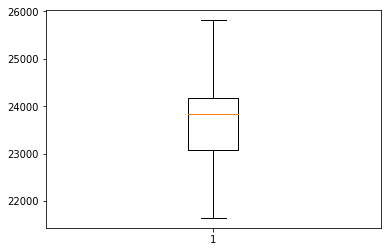

In [16]:
scores = performance.repeat_evaluate(GeneralModel, train_df, test_df, config, n_repeats=5)
performance.summarize_scores('lstm', [score[0] for score in scores])

## Approach 5 - use tanh at the final

In [17]:
config = {
    'n_input': n_input,
    'n_nodes': n_nodes,
    'n_batch': n_batch,
    'model': [
        {
            'layer_type': 'LSTM',
            'layer_config': {
                'units': n_input,
                'batch_input_shape': batch_input_shape,
                'stateful': True
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.01
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': n_input,
                'activation': 'tanh'
            }
        },
        {
            'layer_type': 'Dropout',
            'layer_config': {
                'rate': 0.01
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': 1,
                'activation': 'tanh'
            }
        }
    ]
}

Fitting the data: 100%|██████████| 17/17 [00:40<00:00,  2.19s/it]


Id: 100283, Error: 83465.53705969318
Id: 100419, Error: 31245.281497882566
Id: 100421, Error: 28206.819938789646
Id: 100425, Error: 9606.23044223032
Id: 100819, Error: 368.2165073009108
Id: 100973, Error: 2169.4657507531206
Id: 101211, Error: 7211.459345809085
Id: 101321, Error: 2904.795967570401
Id: 101569, Error: 16116.275847256446
Id: 101751, Error: 13172.068044383339
Id: 101819, Error: 5984.501534791915
Id: 101980, Error: 148031.37852701984
Id: 102008, Error: 17309.428736366663
Id: 102093, Error: 1433.9017782485928
Id: 102822, Error: 6113.785182212009
Id: 102918, Error: 2299.269359340478
Id: 103320, Error: 3429.707362085006
 > 22298.125


Fitting the data: 100%|██████████| 17/17 [00:40<00:00,  2.18s/it]


Id: 100283, Error: 98176.55012290756
Id: 100419, Error: 33112.790898409505
Id: 100421, Error: 22040.32590619763
Id: 100425, Error: 7739.176241165839
Id: 100819, Error: 366.6775442219619
Id: 100973, Error: 2145.606143263513
Id: 101211, Error: 7219.091193338961
Id: 101321, Error: 1963.479601966789
Id: 101569, Error: 16262.462518694141
Id: 101751, Error: 12396.245604879508
Id: 101819, Error: 4884.601245083108
Id: 101980, Error: 160423.0617650122
Id: 102008, Error: 15051.50745224086
Id: 102093, Error: 1544.739579501563
Id: 102822, Error: 5458.625659369485
Id: 102918, Error: 2165.271238120357
Id: 103320, Error: 3171.438193645597
 > 23183.627


Fitting the data: 100%|██████████| 17/17 [00:41<00:00,  2.21s/it]


Id: 100283, Error: 72505.52155360044
Id: 100419, Error: 20875.704868294575
Id: 100421, Error: 17082.97774681575
Id: 100425, Error: 6455.8004779765315
Id: 100819, Error: 344.3747218064015
Id: 100973, Error: 2117.509690726802
Id: 101211, Error: 6940.829603645208
Id: 101321, Error: 2832.5944108497765
Id: 101569, Error: 15375.81645514549
Id: 101751, Error: 11986.223654158262
Id: 101819, Error: 3282.022635571651
Id: 101980, Error: 182211.63332179192
Id: 102008, Error: 15753.785233480725
Id: 102093, Error: 1770.6611449418003
Id: 102822, Error: 4287.95445021342
Id: 102918, Error: 2909.599619567991
Id: 103320, Error: 2079.3304891514977
 > 21694.844


Fitting the data: 100%|██████████| 17/17 [00:42<00:00,  2.24s/it]


Id: 100283, Error: 79488.52534544094
Id: 100419, Error: 21944.435976514043
Id: 100421, Error: 22531.564563968295
Id: 100425, Error: 7216.913708568342
Id: 100819, Error: 410.0426027237307
Id: 100973, Error: 1938.127607538546
Id: 101211, Error: 7263.2525680092995
Id: 101321, Error: 2437.495159792547
Id: 101569, Error: 16104.80670151059
Id: 101751, Error: 12406.614174446891
Id: 101819, Error: 4867.262505733387
Id: 101980, Error: 170237.44282484974
Id: 102008, Error: 15822.127632968315
Id: 102093, Error: 1836.1693395989232
Id: 102822, Error: 5068.123031207689
Id: 102918, Error: 2148.9987362116613
Id: 103320, Error: 2305.183940565367
 > 22001.593


Fitting the data: 100%|██████████| 17/17 [00:42<00:00,  2.25s/it]


Id: 100283, Error: 115123.22665229964
Id: 100419, Error: 37653.401368543055
Id: 100421, Error: 24355.348396478865
Id: 100425, Error: 7264.258793325896
Id: 100819, Error: 435.12396215283866
Id: 100973, Error: 2609.8187257611166
Id: 101211, Error: 7174.855977610562
Id: 101321, Error: 2557.4592961421163
Id: 101569, Error: 15929.246284999836
Id: 101751, Error: 11766.941703271283
Id: 101819, Error: 5807.755147939349
Id: 101980, Error: 151943.56118573845
Id: 102008, Error: 13822.523172880212
Id: 102093, Error: 1598.3099110422224
Id: 102822, Error: 7254.730260567793
Id: 102918, Error: 2136.771439781447
Id: 103320, Error: 3419.38334504796
 > 24167.807
lstm: 22669.199 RMSE (+/- 899.247)


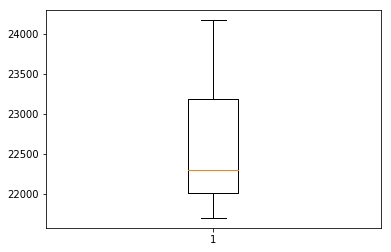

In [18]:
scores = performance.repeat_evaluate(GeneralModel, train_df, test_df, config, n_repeats=5)
performance.summarize_scores('lstm', [score[0] for score in scores])